# Dmpm Lab -9

### Saniya S. Inamdar
### SRN: 201900913
### R.no: 17

## Topic: Wine type (red/white) prediction using logistic regression and wine quality dataset

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,auc,confusion_matrix,precision_score,recall_score,roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing

In [ ]:
df = pd.read_csv("D:\TY sem6\DMPM LAB\winequalityN.csv")

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


<AxesSubplot:>

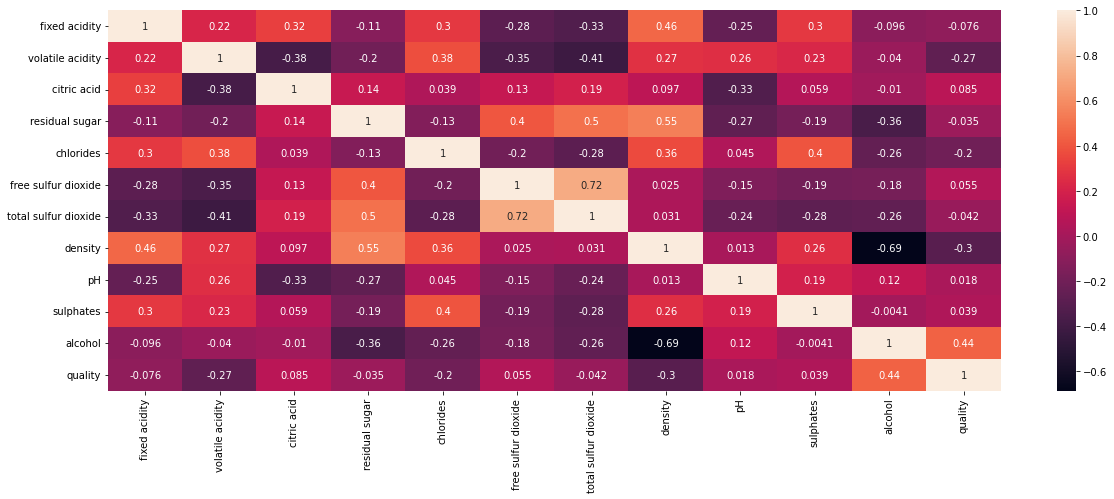

In [10]:
plt.figure(1,(20,7))
sns.heatmap(df.corr(), annot=True)


## Encoding and scaling categorical and numerical variables

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

In [23]:
X_unscaled = df.drop("type",axis=1)
X_unscaled.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
sc = StandardScaler()
sc.fit(X_unscaled)
scaled_values=sc.transform(X_unscaled)
X_scaled = pd.DataFrame(scaled_values)
X_scaled.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
X_scaled.drop("quality",axis=1,inplace=True)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905


In [26]:
num_attribs = list(X_scaled)
print(num_attribs)
cat_attribs = ["quality"]
print(cat_attribs)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
['quality']


In [27]:
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])


### Pipeline for Transforming the data

In [28]:
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
winedf = full_pipeline.fit_transform(X_unscaled)

In [30]:
winedf=pd.DataFrame(winedf)

In [31]:
winedf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
winedf.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","3","4","5","6","7","8","9"]
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,3,4,5,6,7,8,9
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
y=df["type"]
for i in range(len(y["type"])):
    if y["type"][i]=="white":
        y["type"][i]=0
    else:
        y["type"][i]=1

C:\Users\saniy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


KeyError: 17

### Splitting the dataset (80:20)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(winedf,y,test_size=0.2,random_state=10,stratify=y)

In [37]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5170, 18), (5170,), (1293, 18), (1293,))

## First logistic model

In [ ]:
model = LogisticRegression() 

In [39]:
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
model.score(X_train,y_train) 

0.9945841392649903

In [56]:
y_pred_train1 = model.predict(X_train)

summary=classification_report(y_train,y_pred_train1)
print(summary)

              precision    recall  f1-score   support

         red       0.99      0.99      0.99      1274
       white       1.00      1.00      1.00      3896

    accuracy                           0.99      5170
   macro avg       0.99      0.99      0.99      5170
weighted avg       0.99      0.99      0.99      5170



### Check for overfitting and ranking the features accordingly

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn.feature_selection import RFE

In [43]:
model2 = LogisticRegression()

In [45]:
rfe = RFE(estimator=model, step=1,verbose=2)
rfe.fit(X_train,y_train)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


RFE(estimator=LogisticRegression(), verbose=2)

In [46]:
selected_rfe_features=pd.DataFrame({"Features":list(X_train),"Ranking":rfe.ranking_})
selected_rfe_features.sort_values(by="Ranking")

,Features,Ranking
1,volatile acidity,1
3,residual sugar,1
4,chlorides,1
5,free sulfur dioxide,1
6,total sulfur dioxide,1
7,density,1
9,sulphates,1
10,alcohol,1
12,4,1
13,5,2


In [47]:
X_train_rfe = rfe.transform(X_train)

X_train_rfe.shape

(5170, 9)

In [49]:
model2.fit(X_train_rfe, y_train)

LogisticRegression()

In [50]:
r2_rfe = model2.score(X_train_rfe, y_train)
r2_rfe

0.995164410058027

In [52]:
y_pred_train = model2.predict(X_train_rfe)

In [53]:
confusion_matrix(y_train,y_pred_train)

array([[1259,   15],
       [  10, 3886]], dtype=int64)

## Final report of the final model

In [57]:
summary=classification_report(y_train,y_pred_train)
print(summary)

              precision    recall  f1-score   support

         red       0.99      0.99      0.99      1274
       white       1.00      1.00      1.00      3896

    accuracy                           1.00      5170
   macro avg       0.99      0.99      0.99      5170
weighted avg       1.00      1.00      1.00      5170



In [70]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

ValueError: y_true takes value in {'red', 'white'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [68]:
X_test.shape

(1293, 18)